# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [36]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-11-2021.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-12 05:22:15,33.93911,67.709953,53538,2288,44137,7113,Afghanistan,137.529621,4.273600
1,NaN,NaN,NaN,Albania,2021-01-12 05:22:15,41.15330,20.168300,63971,1247,37981,24743,Albania,2222.913337,1.949321
2,NaN,NaN,NaN,Algeria,2021-01-12 05:22:15,28.03390,1.659600,102369,2812,69403,30154,Algeria,233.447127,2.746925
3,NaN,NaN,NaN,Andorra,2021-01-12 05:22:15,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-12 05:22:15,-11.20270,17.873900,18254,420,14825,3009,Angola,55.540227,2.300866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,NaN,NaN,Unknown,Ukraine,2021-01-12 05:22:15,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4008,NaN,NaN,NaN,Nauru,2021-01-12 05:22:15,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4009,NaN,NaN,Niue,New Zealand,2021-01-12 05:22:15,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4010,NaN,NaN,NaN,Tuvalu,2021-01-12 05:22:15,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [37]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-12 05:22:15,33.93911,67.709953,53538,2288,44137,7113,Afghanistan,137.529621,4.273600
1,NaN,NaN,NaN,Albania,2021-01-12 05:22:15,41.15330,20.168300,63971,1247,37981,24743,Albania,2222.913337,1.949321
2,NaN,NaN,NaN,Algeria,2021-01-12 05:22:15,28.03390,1.659600,102369,2812,69403,30154,Algeria,233.447127,2.746925
3,NaN,NaN,NaN,Andorra,2021-01-12 05:22:15,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-12 05:22:15,-11.20270,17.873900,18254,420,14825,3009,Angola,55.540227,2.300866


#### Show the information of the dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3964 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [39]:
df.isna().sum().reset_index()

,index,0
0,FIPS,747
1,Admin2,742
2,Province_State,178
3,Country_Region,0
4,Last_Update,0
5,Lat,89
6,Long_,89
7,Confirmed,0
8,Deaths,0
9,Recovered,0


### Question 2

#### Show the number of Confirmed cases by Country

In [40]:
df.groupby('Country_Region')['Confirmed'].sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,53538
1,Albania,63971
2,Algeria,102369
3,Andorra,8586
4,Angola,18254
...,...,...
195,West Bank and Gaza,148171
196,Winter Olympics 2022,0
197,Yemen,2105
198,Zambia,28596


#### Show the number of Deaths by Country

In [41]:
df.groupby('Country_Region')['Deaths'].sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,2288
1,Albania,1247
2,Algeria,2812
3,Andorra,85
4,Angola,420
...,...,...
195,West Bank and Gaza,1614
196,Winter Olympics 2022,0
197,Yemen,612
198,Zambia,471


#### Show the number of Recovered cases by Country

In [42]:
df.groupby('Country_Region')['Recovered'].sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,44137
1,Albania,37981
2,Algeria,69403
3,Andorra,7724
4,Angola,14825
...,...,...
195,West Bank and Gaza,132158
196,Winter Olympics 2022,0
197,Yemen,1416
198,Zambia,20781


#### Show the number of Active Cases by Country

In [43]:
df.groupby('Country_Region')['Active'].apply(sum).reset_index()

,Country_Region,Active
0,Afghanistan,7113
1,Albania,24743
2,Algeria,30154
3,Andorra,777
4,Angola,3009
...,...,...
195,West Bank and Gaza,14399
196,Winter Olympics 2022,0
197,Yemen,77
198,Zambia,7344


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [44]:
country_summary = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].apply(sum).reset_index()
country_summary 

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,53538,2288,44137,7113
1,Albania,63971,1247,37981,24743
2,Algeria,102369,2812,69403,30154
3,Andorra,8586,85,7724,777
4,Angola,18254,420,14825,3009
...,...,...,...,...,...
195,West Bank and Gaza,148171,1614,132158,14399
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2105,612,1416,77
198,Zambia,28596,471,20781,7344


### Question 3

### Show the countries with no recovered cases

In [45]:
no_recovery = country_summary[country_summary['Recovered'] == 0][['Country_Region','Recovered']]
no_recovery

,Country_Region,Recovered
5,Antarctica,0
17,Belgium,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
156,Serbia,0
169,Summer Olympics 2020,0
171,Sweden,0
180,Tonga,0


#### Show the countries with no confirmed cases

In [46]:
no_confirmed = country_summary[country_summary['Confirmed']==0][['Country_Region', 'Confirmed']]
no_confirmed

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
169,Summer Olympics 2020,0
180,Tonga,0
184,Tuvalu,0
196,Winter Olympics 2022,0


#### Show the countries with no deaths

In [47]:
no_deaths = country_summary[country_summary['Deaths']==0][['Country_Region','Confirmed', 'Deaths', 'Recovered']]
no_deaths

,Country_Region,Confirmed,Deaths,Recovered
5,Antarctica,0,0,0
31,Cambodia,392,0,374
51,Dominica,109,0,101
76,Holy See,27,0,15
92,Kiribati,0,0,0
93,"Korea, North",0,0,0
98,Laos,41,0,40
114,Marshall Islands,4,0,4
125,Nauru,0,0,0
136,Palau,0,0,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [48]:
country_summary.nlargest(10,'Confirmed')

,Country_Region,Confirmed,Deaths,Recovered,Active
185,US,22814859,381469,0,22394994
80,India,10479179,151327,10111294,216558
24,Brazil,8140865,203750,7273237,654932
146,Russia,3389733,61389,2771793,556551
189,United Kingdom,3127617,106085,7153,3038398
63,France,2844642,68196,208997,2567449
183,Turkey,2336476,22981,2208451,105044
86,Italy,2289021,79203,1633839,575979
166,Spain,2111782,52275,150376,1909131
67,Germany,1923692,40686,1590171,309146


#### Show the Top 10 Countries with Active cases

In [49]:
country_summary.nlargest(10,'Active')

,Country_Region,Confirmed,Deaths,Recovered,Active
185,US,22814859,381469,0,22394994
189,United Kingdom,3127617,106085,7153,3038398
63,France,2844642,68196,208997,2567449
166,Spain,2111782,52275,150376,1909131
117,Mexico,1541633,134368,1160373,1407265
140,Peru,1035184,95233,969863,938415
127,Netherlands,890566,12512,11089,866965
24,Brazil,8140865,203750,7273237,654932
17,Belgium,665223,20122,0,654076
86,Italy,2289021,79203,1633839,575979


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [50]:
import matplotlib.pyplot as plt

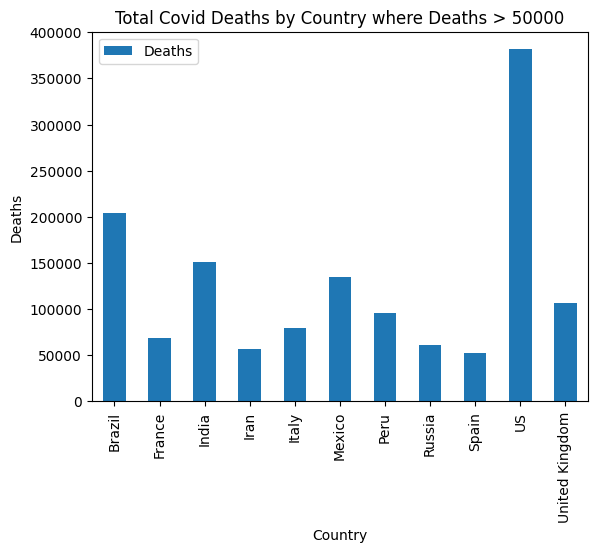

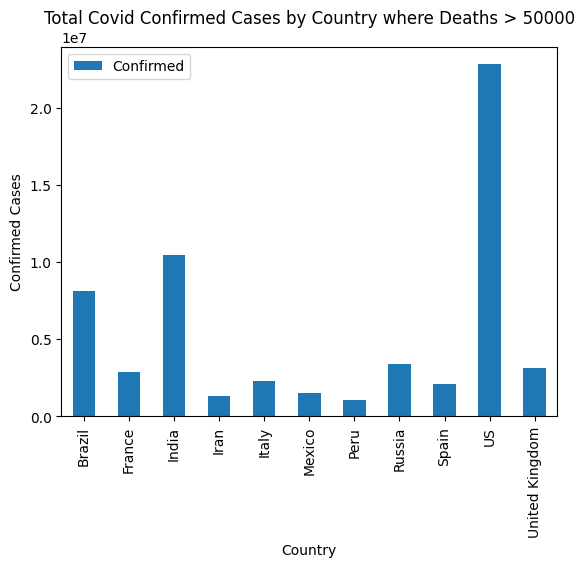

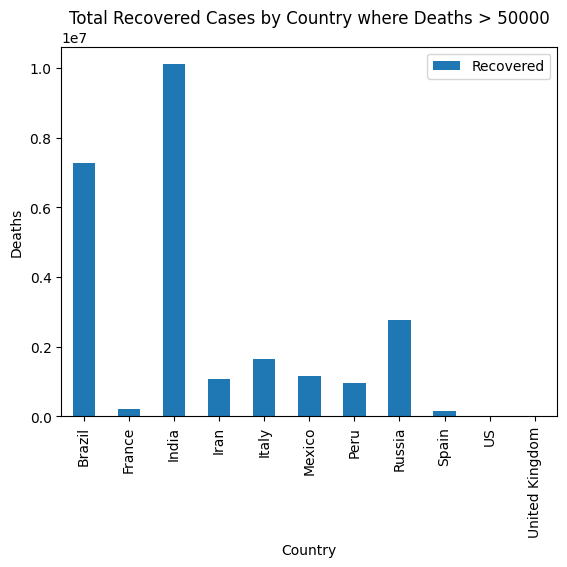

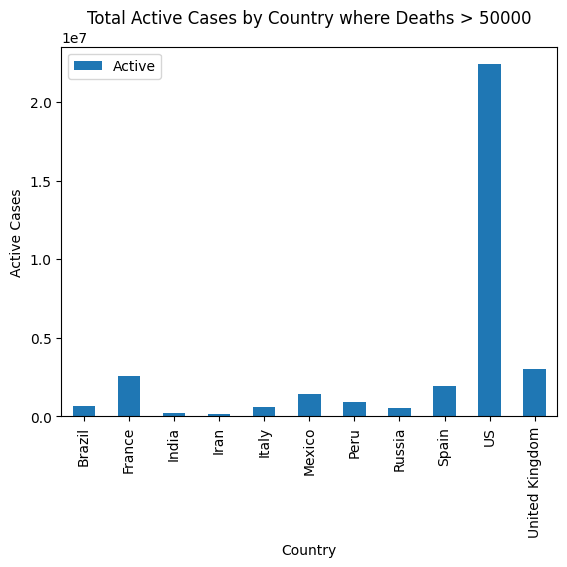

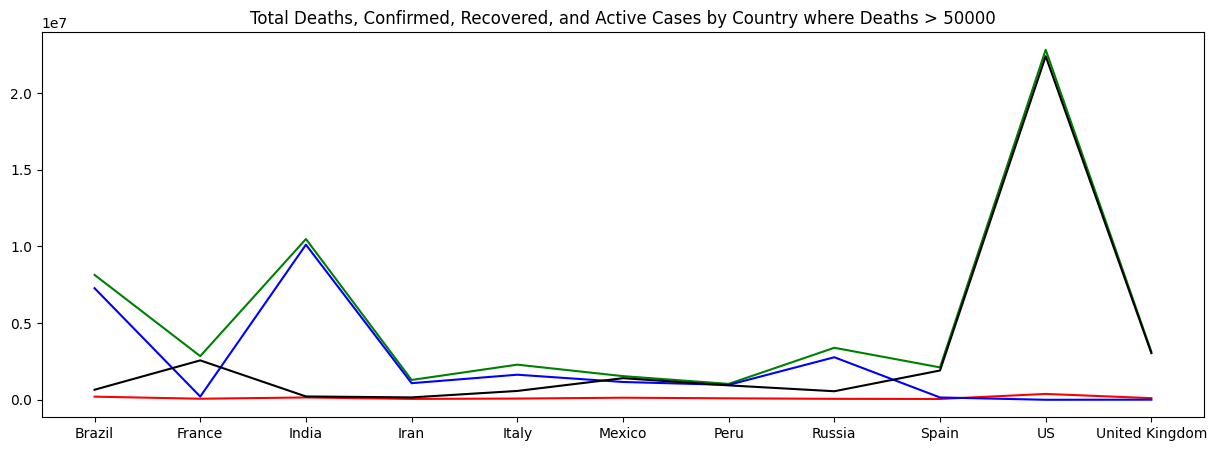

In [51]:
plot_data = country_summary[country_summary['Deaths'] > 50000]
# print(plot_data)
# country_active = plot_data.sort_values('Last_Update').groupby('Country').tail(1)
# plt.figure()
# x = plot_data['Country_Region']
# deaths = plot_data['Deaths']
# confirmed = plot_data['Confirmed']
# recovered = plot_data['Recovered']
# active = plot_data['Active']
# plt.show()

plot_data.plot(x='Country_Region',
        y='Deaths',
        kind='bar',
        stacked=False,
        title='Total Covid Deaths by Country where Deaths > 50000',
        ylabel='Deaths',
        xlabel='Country')

plot_data.plot(x='Country_Region',
        y='Confirmed',
        kind='bar',
        stacked=False,
        title='Total Covid Confirmed Cases by Country where Deaths > 50000',
        ylabel='Confirmed Cases',
        xlabel='Country')

plot_data.plot(x='Country_Region',
        y='Recovered',
        kind='bar',
        stacked=False,
        title='Total Recovered Cases by Country where Deaths > 50000',
        ylabel='Deaths',
        xlabel='Country')

plot_data.plot(x='Country_Region',
        y='Active',
        kind='bar',
        stacked=False,
        title='Total Active Cases by Country where Deaths > 50000',
        ylabel='Active Cases',
        xlabel='Country')

plt.figure(figsize=(15, 5))
plt.plot(plot_data['Country_Region'], plot_data['Deaths'],color='red')
plt.plot(plot_data['Country_Region'], plot_data['Confirmed'],color='green')
plt.plot(plot_data['Country_Region'], plot_data['Recovered'], color='blue')
plt.plot(plot_data['Country_Region'], plot_data['Active'], color='black')
 
plt.title('Total Deaths, Confirmed, Recovered, and Active Cases by Country where Deaths > 50000')
plt.show()

### Note that US did not any Recovered cases in the dataset.

### Question 6

### Plot Province/State wise Deaths in USA

In [52]:
import plotly.express as px

In [53]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [54]:
covid_data.columns
us_summary = covid_data[covid_data['Country_Region'] == 'US']
state_summary= us_summary.groupby('Province_State').sum().reset_index()
covid_data

C:\Users\rjbat\AppData\Local\Temp\ipykernel_12560\3287144862.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_summary= us_summary.groupby('Province_State').sum().reset_index()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,NaN,NaN,Unknown,Ukraine,2021-01-10 05:22:12,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4008,NaN,NaN,NaN,Nauru,2021-01-10 05:22:12,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4009,NaN,NaN,Niue,New Zealand,2021-01-10 05:22:12,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4010,NaN,NaN,NaN,Tuvalu,2021-01-10 05:22:12,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


In [55]:
state_deaths_fig = px.bar(state_summary, x='Province_State', y='Deaths', title='State wise deaths reported of COVID-19 in USA')
state_deaths_fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [56]:
# state_active = us_summary.sort_values('Last_Update').groupby('Province_State').tail(1)
# US has not reported recovered cases, thus skewing the data.

state_active_fig = px.bar(state_summary, x='Province_State', y='Active', title='State wise deaths reported of COVID-19 in USA')
state_active_fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [57]:
state_confirmed_fig = px.bar(state_summary, x='Province_State', y='Confirmed', title='State wise confirmed cases reported of COVID-19 in USA')
state_confirmed_fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [58]:
import plotly.express as px
import plotly.io as pio

In [59]:
confirmed_cases = covid_data.groupby('Last_Update')['Last_Update', 'Confirmed'].sum().reset_index()
fig = px.line(confirmed_cases, x="Last_Update", y="Confirmed",
             title="Worldwide Confirmed Cases Over Time")
fig.show()

C:\Users\rjbat\AppData\Local\Temp\ipykernel_12560\2550618068.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\rjbat\AppData\Local\Temp\ipykernel_12560\2550618068.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

